## Analysis of multivariate data - NHANES case study

In this notebook, we illustrate several basic techniques for exploring data using methods for understanding multivariate relationships.  The statistical methods discussed here will parallel the methods discussed in the multivariate methods section of the course, and build on the univariate analysis discussed earlier.  As with the univariate notebook, we use here the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study for illustration.

Many of the analyses presented in this notebook use the Matplotlib and Seaborn libraries for data visualization.  These are very powerful tools that give you a vast number of options when constructing plots.  We will not explain every option to every function in the examples below. You can use the [Matplotlib](https://matplotlib.org/users/index.html) and [Seaborn](https://seaborn.pydata.org/tutorial.html) documentation to fully understand the options, and you can experiment with these and other plots on your own to get a better sense of what can be done.   

We start with the usual library import statements:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_columns',100)

Next we load the NHANES data, just as we did for the univariate analyes.

In [2]:
da = pd.read_csv("dataset/nhanes_2015_2016.csv")

In [14]:
import warnings
warnings.filterwarnings("ignore")

### Quantitative bivariate data

Bivariate data arise when every "unit of analysis" (e.g. a person in the NHANES dataset) is assessed with respect to two traits (the NHANES subjects were assessed for many more than two traits, but we can consider two traits at a time here).  

A scatterplot is a very common and easily-understood visualization of quantitative bivariate data.  Below we make a scatterplot of arm length against leg length.  This means that arm length ([BMXARML](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXARML)) is plotted on the vertical axis and leg length ([BMXLEG](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXLEG)) is plotted on the horizontal axis).  We see a positive dependence between the two measures -- people with longer arms tend to have longer legs, and vice-versa.  However it is far from a perfect relationship.

In a scatterplot with more than around 100 points, "overplotting" becomes an issue.  This means that many points fall on top of each other in the plot, which obscures relationships in the middle of the distribution and over-emphasizes the extremes.  One way to mitigate overplotting is to use an "alpha" channel to make the points semi-transparent, as we have done below.

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

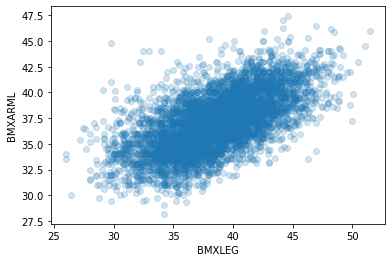

In [39]:
sns.regplot(x="BMXLEG", y="BMXARML", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})

**Observation:** The relationship between the two systolic blood pressures is positively linear. There is a lot of overlapping observed in the plot.

Another way to avoid overplotting is to make a plot of the "density" of points.  In the plots below, darker colors indicate where a greater number of points fall.  The two plot margins show the densities for the arm lengths and leg lengths separately, while the plot in the center shows their density jointly.

This plot also shows the Pearson correlation coefficient between the arm length and leg length, which is 0.62.  As discussed in the course, the Pearson correlation coefficient ranges from -1 to 1, with values approaching 1 indicating a more perfect positive dependence.  In many settings, a correlation of 0.62 would be considered a moderately strong positive dependence. 

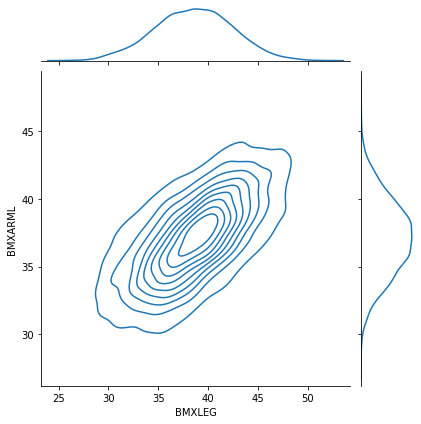

In [47]:
#ignore deprecation warning message
px =sns.jointplot(x="BMXLEG", y="BMXARML", kind='kde', data=da)

As another example with slightly different behavior, we see that systolic and diastolic blood pressure (essentially the maximum and minimum blood pressure between two consecutive heart beats) are more weakly correlated than arm and leg length, with a correlation coefficient of 0.32.  This weaker correlation indicates that some people have unusually high systolic blood pressure but have average diastolic blood pressure, and vice versa.

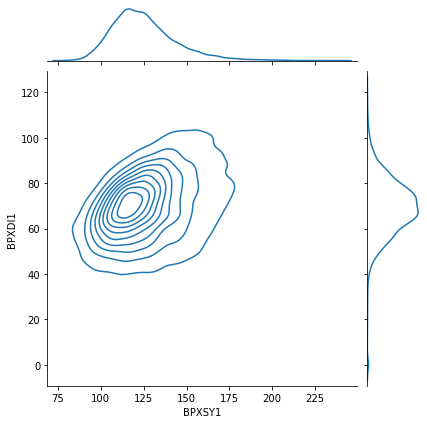

In [48]:
#ignore deprecation warning message
sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da)

To understand the systolic and diastolic blood pressure data and their relationships more, make a joint plot. Jointplot shows the density of the data and the distribution of both the variables at the same time

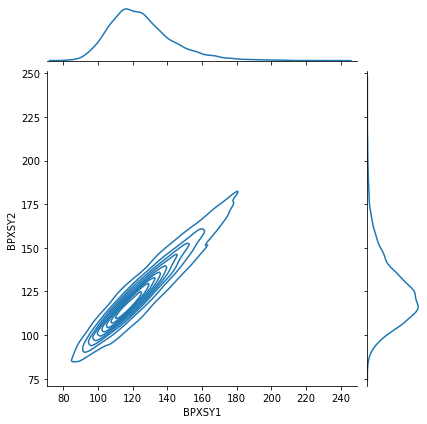

In [49]:
#ignore deprecation warning message
jp = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da)

**Observation:** In this plot, it shows very clearly that the densest area is from 115 to 135. Both the first and second systolic blood pressure distribution is right-skewed. Also, both of them have some outliers.

Now in order to find out some more correlations between various parameters in the data, we will carry out further anaylsis.

We will now check how the systolic blood pressure of a person is expected to change with age, and also compare the change in men and women.

<AxesSubplot:xlabel='RIDAGEYR', ylabel='BPXSY1'>

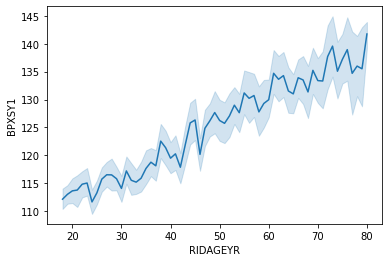

In [3]:
#Relation of Systolic Blood Pressure with respect to age of the patient
sns.lineplot(x="RIDAGEYR", y="BPXSY1", data=da)

The correlation coefficient comes out to be 0.47, which implies that there is a weak positive correlation between the age of a patient and the Systolic Blood Pressure. Hence, we can conclude that on an average, a person is expected to have a higher blood pressure as his age increases, or in other words,

Older people tend to have higher Blood Pressure as compared to younger people.

<AxesSubplot:xlabel='RIDAGEYR', ylabel='BPXSY1'>

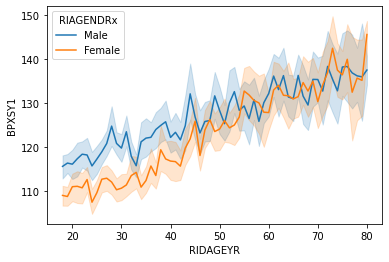

In [51]:
#Relation of Systolic Blood Pressure with respect to gender and age of the patient
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
sns.lineplot(x="RIDAGEYR", y="BPXSY1", hue="RIAGENDRx", data=da)

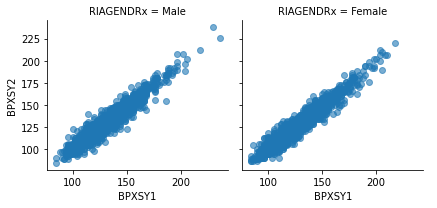

In [52]:
sns.FacetGrid(da, col = "RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXSY2", alpha =0.6).add_legend()

This picture shows, both the correlations are positively linear. Let’s find out the correlation with more clarity.(check next section)

We see from the figure above that within each gender, within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age. However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.


## Conclusion
From the analysis that we carried out on our dataset, we reached the following conclusions :

a. Correlation coefficient between the systolic and diastolic blood pressure (essentially the maximum and minimum blood pressure between two consecutive heart beats) comes out to be 0.32, which signifies a weak correlation between the two values. This means that patients having high systolic blood pressure may not necessarily have high diastolic blood pressure, and vice versa.

b. The values of two repeated measures of systolic blood pressure taken a few minutes apart on the same person, are very highly correlated, with a correlation coefficient of around 0.96.

c. The correlation coefficient between the age of a patient and the Systolic Blood Pressurecomes out to be 0.47, which implies that there is a weak positive correlation between the two parameters. Hence, we can conclude that on an average, a person is expected to have a higher blood pressure as his age increases, or in other words, Older people tend to have higher Blood Pressure as compared to younger people.

d. Within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- In younger people, men have substantially higher blood pressures than women of the same age. However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse.

### Heterogeneity and stratification

Most human characteristics are complex -- they vary by gender, age, ethnicity, and other factors.  This type of variation is often referred to as "heterogeneity".  When such heterogeneity is present, it is usually productive to explore the data more deeply by stratifying on relevant factors, as we did in the univariate analyses.  

Below, we continue to probe the relationship between leg length and arm length, stratifying first by gender, then by gender and ethnicity. The gender-stratified plot indicates that men tend to have somewhat longer arms and legs than women -- this is reflected in the fact that the cloud of points on the left is shifted slightly up and to the right relative to the cloud of points on the right.  In addition, the correlation between arm length and leg length appears to be somewhat weaker in women than in men.

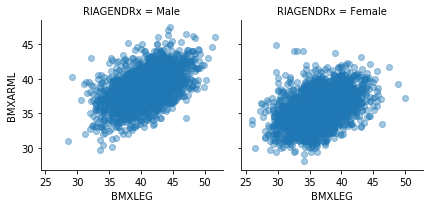

In [7]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.4).add_legend()

Consistent with the scatterplot, a slightly weaker correlation between arm length and leg length in women (compared to men) can be seen by calculating the correlation coefficient separately within each gender.  

The '`corr`' method of a dataframe calculates the correlation coefficients for every pair of variables in the dataframe.  This method returns a "correlation matrix", which is a table containing the correlations between every pair of variables in the data set.  Note that the diagonal of a correlation matrix always contains 1's, since a variable always has correlation 1 with itself.  The correlation matrix is also symmetric around this diagonal, since the correlation between two variables '`X`' and '`Y`' does not depend on the order in which we consider the two variables.  

In the results below, we see that the correlation between leg length and arm length in men is 0.50, while in women the correlation is 0.43.

In [8]:
print(da.loc[da.RIAGENDRx=="Female", ["BMXLEG", "BMXARML"]].dropna().corr())
print(da.loc[da.RIAGENDRx=="Male", ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


Next we look to stratifying the data by both gender and ethnicity.  This results in 2 x 5 = 10 total strata, since there are 2 gender strata and 5 ethnicity strata. These scatterplots reveal differences in the means as well a diffrences in the degree of association (correlation) between different pairs of variables.  We see that although some ethnic groups tend to have longer/shorter arms and legs than others, the relationship between arm length and leg length within genders is roughly similar across the ethnic groups.  

One notable observation is that ethnic group 5, which consists of people who report being multi-racial or are of any race not treated as a separate group (due to small sample size), the correlation between arm length and leg length is stronger, especially for men.  This is not surprising, as greater heterogeneity can allow correlations to emerge that are indiscernible in more homogeneous data.   

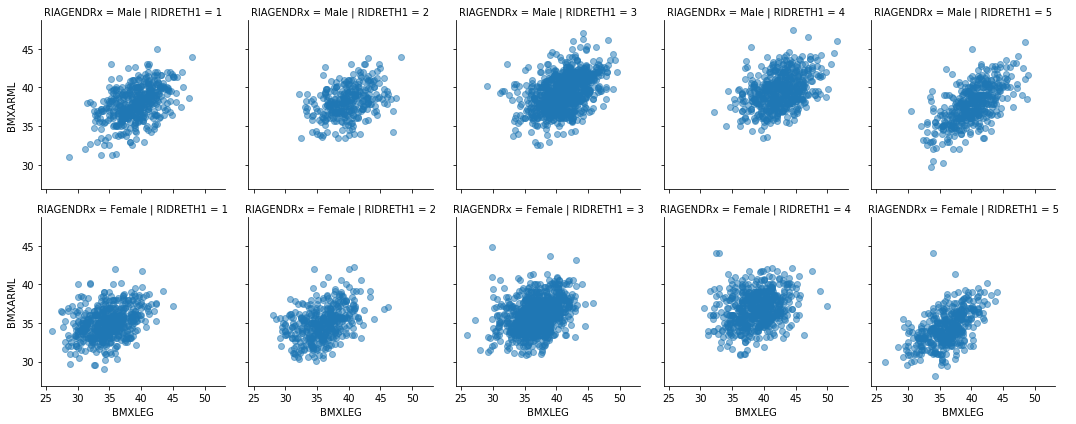

In [9]:
_ = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()

Human behavior can change with so many different factors such as gender, education level, ethnicity, financial situation, and so on. In this dataset, we have ethnicity (“RIDRETH1”) information as well. Check the effect of both ethnicity and gender on the relationship between both the systolic blood pressures.

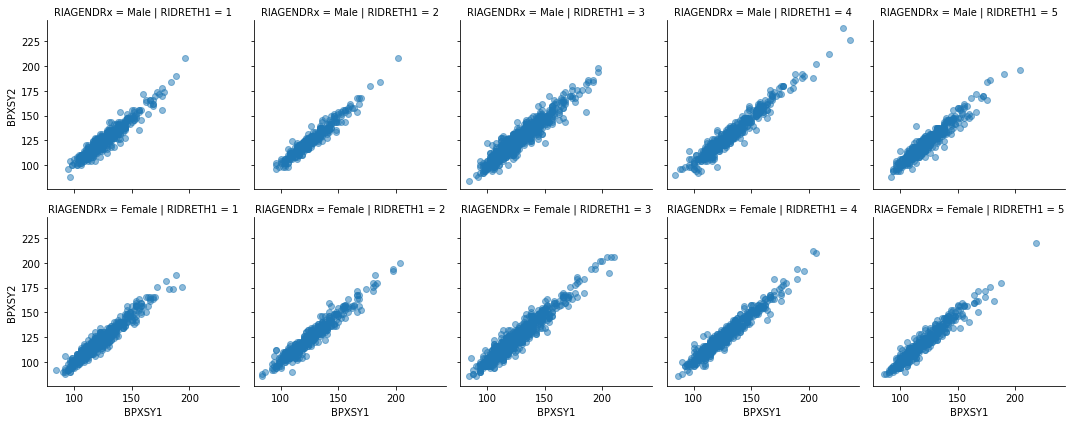

In [53]:
sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXSY2", alpha = 0.5).add_legend()

With different ethnic origins and gender, correlations seem to be changing a little bit but generally stays positively linear as before.

### Categorical bivariate data

In this section we discuss some methods for working with bivariate data that are categorical.  We can start with a contingency table, which counts the number of people having each combination of two factors.  To illustrate, we will consider the NHANES variables for marital status and education level.

First, we create new versions of these two variables using text labels instead of numbers to represent the categories.  We also create a new data set that omits people who responded "Don't know" or who refused to answer these questions.

In [10]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDMARTLx != "Refused"), :]

Now we can create a contingency table, counting the number of people in each cell defined by a combination of education and marital status.

In [11]:
x = pd.crosstab(db.DMDEDUC2x, da.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


The results will be easier to interpret if we normalize the data.  A contingency table can be normalized in three ways -- we can make the rows sum to 1, the columns sum to 1, or the whole table sum to 1.  Below we normalize within rows.  This gives us the proportion of people in each educational attainment category who fall into each group of the marital status variable.

The modal (most common) marital status for people within each educational attainment group is "married".  However quantitatively, the proportion of people who are married varies substantially, and is notably higher for college graduates (around 61%) compared to groups with lower educational attainment.

In [12]:
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


We can also normalize within the columns instead of normalizing within the rows.  This gives us the proportion of people with each marital status group who have each level of educational attainment.

In [13]:
x.apply(lambda z: z/z.sum(), axis=0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


We see here that the plurality of divorced people have some college but have not graduated from college, while the plurality of married people are college graduates.

It is quite plausible that there are gender differences in the relationship between educational attainment and marital status.  Therefore we can look at the proportion of people in each marital status category, for each combination of the gender and education variables.  This analyses yields some interesting trends, notably that women are much more likely to be widowed or divorced than men (e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group).

In [14]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

One factor behind the greater number of women who are divorced and widowed could be that women live longer than men.  To minimize the impact of this factor, we can recalculate the above table using a few narrow bands of ages. To simplify here, we collapse the marital status data to characterize people as being either "married" or "unmarried"  This allows us to focus on the marriage rate, which is a widely-studied variable in social science research.

There are a number of intriguing results here.  For example, the marriage rate seems to drop as college-educated people get older (e.g. 71% of college educated women between 49 and 50 are married, but only 65% of college educated women between 50 and 59 are married, an even larger drop occurs for men).  However in people with a HS/GED level of education, the marriage rate is higher for older people (although it is lower compared to the college educated sample).  There are a number of possible explanations for this, for example, that remarriage after divorce is less common among college graduates.

In [15]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


We conclude this section by noting that marital status is associated with many factors, including gender and eduational status, but also varies strongly by age and birth cohort.  For example, it is unlikely for young people to be widowed, and it is less likely for older people to be "never married", since a person can transition from "never married" into one of the other categories, but can never move back.  Below we will consider the role of age in more detail, and later in the course we will revisit these questions using more sophisticated analytic methods that can account for all of these factors simultaneously.  However, since NHANES is a cross-sectional study, there are certain important questions that it cannot be used to answer.  For example, while we know each person's current marital status, we do not know their full marital history (e.g. how many times and at what ages they were married or divorced).

### Mixed categorical and quantitative data

Another situation that commonly arises in data analysis is when we wish to analyze bivariate data consisting of one quantitative and one categorical variable. To illustrate methods that can be used in this setting, we consider the relationship between marital status and age in the NHANES data.  Specifically, we consider the distribution of ages for people who are currently in each marital status category.  A natural tool in this setting is side-by-side boxplots.  Here we see some unsurprising things -- widowed people tend to be older, and never-married people tend to be younger.

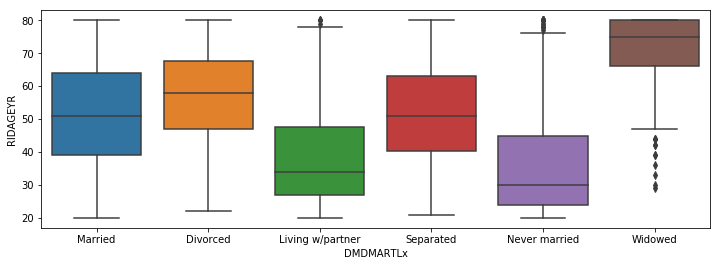

In [16]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

When we have enough data, a "violinplot" gives a bit more insight into the shapes of the distributions compared to a traditional boxplot.  The violinplot below is based on the same data as the boxplot above.  We can see quite clearly that the distributions with low mean (living with partner, never married) are strongly right-skewed, while the distribution with high mean (widowed) is strongly left-skewed.  The other distributions have intermediate mean values, and are approximately symmetrically distributed.  Note also that the never-married distribution has a long shoulder, suggesting that this distributions includes many people who are never-married because they are young, and have not yet reached the ages when people typically marry, but also a substantial number of people will marry for the first time anywhere from their late 30's to their mid-60's.

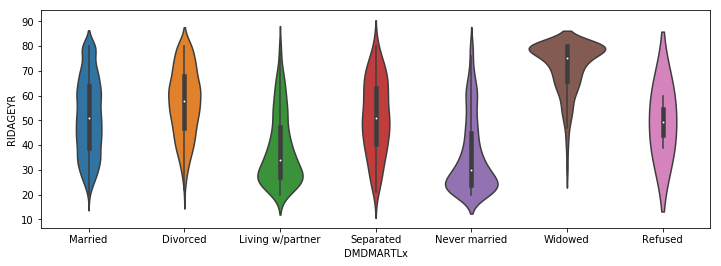

In [17]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(da.DMDMARTLx, da.RIDAGEYR)

Here, blue color shows the male population distribution and orange color represents the female population distribution. Only ‘never married’ and ‘living with partner’categories have similar distributions for the male and female populations. Every other category has a notable difference in the male and female populations.

# Section 3

In [7]:
# get columns names
col_names = da.columns
col_names


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'RIAGENDRx'],
      dtype='object')

In [8]:
# One way to get the column names we want to keep is simply by copying from the above output and storing in a list
keep = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST']

In [9]:
# Another way to get only column names that include 'BMX' is with list comprehension
# [keep x for x in list if condition met]
[column for column in col_names if 'BMX' in column]

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [10]:
keep = [column for column in col_names if 'BMX' in column]
da_BMX = da[keep]
da_BMX.head()


,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


There are two methods for selecting by row and column. 
# link for pandas cheat sheets
* df.loc[row labels or bool, col labels or bool]
* df.iloc[row int or bool, col int or bool]

### [From pandas docs](https://pandas.pydata.org/pandas-docs/stable/indexing.html]):  
* `[ ]` column indexing
* .loc is primarily label based, but may also be used with a boolean array.   
* .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [12]:
da.loc[:, keep].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


In [13]:
index_bool = np.isin(da.columns, keep)
index_bool 


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False])

In [14]:
da.iloc[:,index_bool].head() # Indexing with boolean list

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


### Selection by conditions

In [17]:
# Lets only look at rows who 'BMXWAIST' is larger than the median
waist_median = pd.Series.median(da_BMX['BMXWAIST']) # get the median of 'BMXWAIST'
waist_median

98.3

In [18]:
da_BMX[da_BMX['BMXWAIST'] > waist_median].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
9,108.3,179.4,33.6,46.0,44.1,38.5,116.0


In [20]:
# Lets add another condition, that 'BMXLEG' must be less than 32
condition1 = da_BMX['BMXWAIST'] > waist_median
condition2 = da_BMX['BMXLEG'] < 32
da_BMX[condition1 & condition2].head() # Using [] method
# Note: can't use 'and' instead of '&'

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [21]:
da_BMX.loc[condition1 & condition2, :].head() # Using df.loc[] method
# note that the conditiona are describing the rows to keep

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [22]:
# Lets make a small dataframe and give it a new index so can more clearly see the differences between .loc and .iloc
tmp = da_BMX.loc[condition1 & condition2, :].head()
tmp.index = ['a', 'b', 'c', 'd', 'e'] # If you use different years than 2015-2016, this my give an error. Why?
tmp

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,35.4,31.6,32.7,33.7,113.5
b,75.6,145.2,35.9,31.0,33.1,36.0,108.0
c,63.7,147.9,29.1,26.0,34.0,31.5,110.0
d,105.9,157.7,42.6,29.2,35.0,40.7,129.1
e,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [23]:
tmp.loc[['a', 'b'],'BMXLEG']

a    31.6
b    31.0
Name: BMXLEG, dtype: float64

In [24]:
tmp.iloc[[0, 1],3]

a    31.6
b    31.0
Name: BMXLEG, dtype: float64

In [25]:
tmp.loc[:, 'BMXBMI']

a    35.4
b    35.9
c    29.1
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [26]:
tmp.loc[:, 'BMXBMI'].values

array([35.4, 35.9, 29.1, 42.6, 35.2])

In [27]:
tmp.iloc[:, 2]

a    35.4
b    35.9
c    29.1
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [28]:
# Here is another example of using a boolean list for indexing columns
tmp.loc[:, [False, False, True] +[False]*4]

,BMXBMI
a,35.4
b,35.9
c,29.1
d,42.6
e,35.2


In [29]:
tmp.iloc[:, 2]

a    35.4
b    35.9
c    29.1
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [30]:
# We can use the .loc and .iloc methods to change values within the dataframe
tmp.iloc[0:3,2] = [0]*3
tmp.iloc[:,2]

a     0.0
b     0.0
c     0.0
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [31]:
tmp.loc['a':'c','BMXBMI'] = [1]*3
tmp.loc[:,'BMXBMI']

a     1.0
b     1.0
c     1.0
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [32]:
# We can use the [] method when changing all the values of a column
tmp['BMXBMI'] = range(0, 5)
tmp

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,0,31.6,32.7,33.7,113.5
b,75.6,145.2,1,31.0,33.1,36.0,108.0
c,63.7,147.9,2,26.0,34.0,31.5,110.0
d,105.9,157.7,3,29.2,35.0,40.7,129.1
e,77.5,148.3,4,30.5,34.0,34.4,107.6


In [33]:
# The correct way to do the above is with .loc or .iloc
tmp.loc[tmp.BMXBMI > 2, 'BMXBMI']  = [10]*2
tmp # Now contains the chances

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,0,31.6,32.7,33.7,113.5
b,75.6,145.2,1,31.0,33.1,36.0,108.0
c,63.7,147.9,2,26.0,34.0,31.5,110.0
d,105.9,157.7,10,29.2,35.0,40.7,129.1
e,77.5,148.3,10,30.5,34.0,34.4,107.6


## Section 4

our goal here is to find the mean of the first 100 rows of our blood pressure variable when our age variable is over 60 ie We want to find the mean of first 100 rows of 'BPXSY1' when 'RIDAGEYR' > 60

In [3]:
da.columns.get_loc("BPXSY1")

16

In [4]:
pd.Series.mean(da[da.RIDAGEYR > 60].iloc[range(0,100),16]) 

136.29166666666666

In [5]:
# test our code on only ten rows so we can easily check
test = pd.DataFrame({'col1': np.repeat([3,1],5), 'col2': range(3,13)}, index=range(1,11))
test

,col1,col2
1,3,3
2,3,4
3,3,5
4,3,6
5,3,7
6,1,8
7,1,9
8,1,10
9,1,11
10,1,12


In [7]:
# should return 5

pd.Series.mean(test[test.col1 > 2].iloc[range(0,5),1]) 

5.0

We've tested our code on something simple that we know the answer to.

## Section 5

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

<AxesSubplot:xlabel='BPXDI1', ylabel='BPXDI2'>

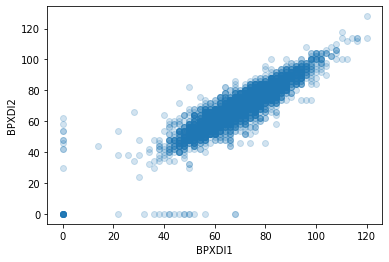

In [8]:
sns.regplot(x = 'BPXDI1', y = 'BPXDI2', data = da, fit_reg = False, scatter_kws={"alpha": 0.2})


          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000
          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


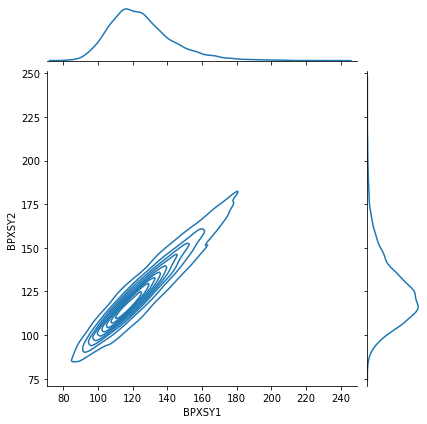

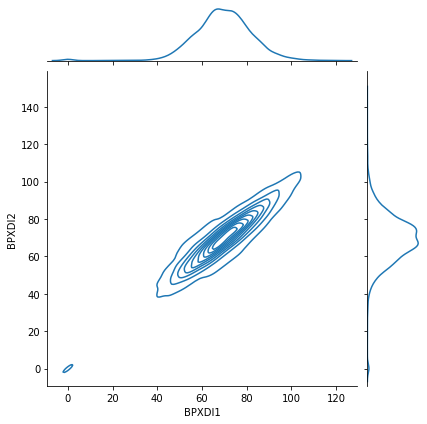

In [10]:
print(da[["BPXSY1", "BPXSY2"]].dropna().corr()) #correlation for the systolic blood pressure
a = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da)

print(da[["BPXDI1", "BPXDI2"]].dropna().corr()) #correlation for the diastolic blood pressure
b = sns.jointplot(x="BPXDI1", y="BPXDI2", kind='kde', data=da)

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The pearson correlation between the systolic blood pressure is 0.96 which indicates that the relationship between the variables is very strong.
The pearson correlation between the distolic blood pressure is .88, which is lower than the systolic blood pressure but it is still high enough to consider their relationship pretty strong.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000
          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


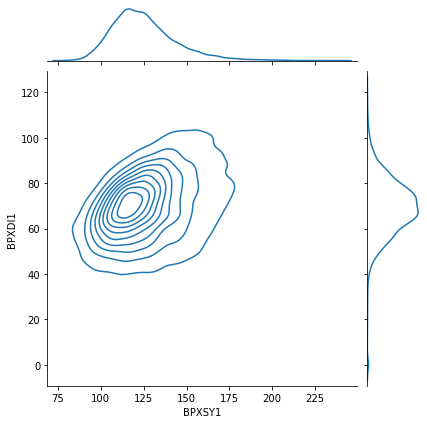

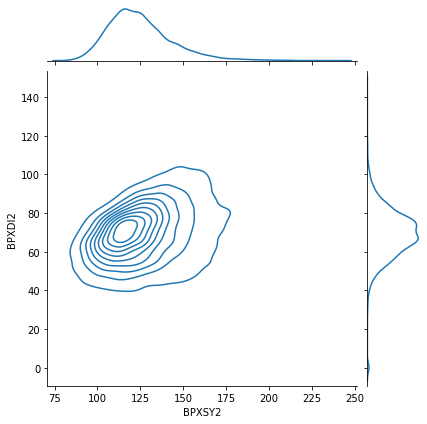

In [11]:
print(da[["BPXSY1", "BPXDI1"]].dropna().corr()) #correlation for the first systolic blood pressure and the first diastolic blood pressure
c = sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da)

print(da[["BPXSY2", "BPXDI2"]].dropna().corr()) #correlation for the second systolic blood pressure and the second diastolic blood pressure
d = sns.jointplot(x="BPXSY2", y="BPXDI2", kind='kde', data=da)

The first systolic blood pressure and the first diastolic blood pressure has a higher strength compared to that of the second diastolic blood pressure and the second systolic blood pressure


## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

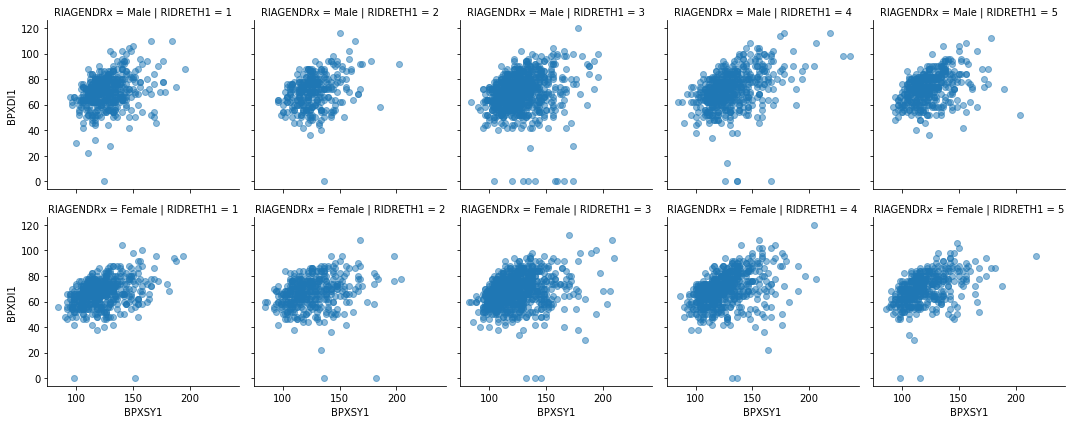

In [12]:
#constructing a boolean value for age and gender
da["RIAGENDRx"] = da["RIAGENDR"].map({1: "Male", 2: "Female"}) 
first_systolic_dystolic= sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

We can absorve that the realtionship between the systolic blood pressure and the diastolic blood pressure is roughly similar among all ethnic groups and gender

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

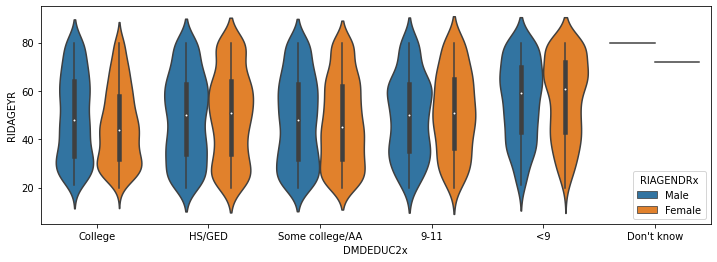

In [15]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})

plt.figure(figsize = (12,4))
ages_gender_educational_attainment = sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR, da.RIAGENDRx)

The violin plot above shows that the age group for male and female with college degrees and some college/AA is right skewed whereas the age group for male and female with less than 9th grade education is left skewed. The data for HS/GED and 9-11 grade is symmetric or equally distributed.


## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

In [16]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})
da["HIQ210x"].fillna("Missing", inplace = True)
freq_table = pd.crosstab(da.RIDRETH1x, da.HIQ210x)
freq_table.apply(lambda z: z/z.sum(), axis = 1)

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.002947,0.337917,0.567780,0.091356
Non-Hispanic Black,0.000815,0.152404,0.754686,0.092095
Non-Hispanic White,0.001088,0.103861,0.834693,0.060359
Other Hispanic,0.000000,0.233333,0.668000,0.098667
Other Race - Including Multi-Racial,0.002220,0.117647,0.807991,0.072142


Non-hispanic whites answered 'NO' the most compared to the total for the race. Therefore, Non-Hispanic whites has the highest rate of being uninsured in the past year.

